<a href="https://colab.research.google.com/github/MohamedElgharbawy/Z3Performance/blob/main/Z3_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Z3 Performance

This program plots Z3's performance when solving theorems with n random variables and a random set of [1, n<sup>2</sup>] constraints.

In [ ]:
!pip install z3-solver

In [ ]:
from z3 import *
import random
import operator
import time
import matplotlib.pyplot as plt

In [ ]:
ops = [operator.lt, operator.le, operator.ge, operator.gt]

In [ ]:
def z3_performance(num_var: int, use_max: bool):
  """
  Measure Z3's performance to check a model for num_var variables with
  1 - num_var**2 constraints.
  Returns the a tuple, a list of the number of constraints, and a list of the
  corresponding times.
  """
  X = IntVector('x', num_var)

  if use_max:
    solver = Optimize()
    solver.maximize(Sum(X))
  else:
    solver = Solver()

  # Graphing lists
  num_constraints = []
  times = []

  # Constraints
  constraints = []
  for i in range(1, num_var**2 + 1):
    num_constraints.append(i)

    # Get a random operator
    op = random.choice(ops)
    
    # Create a random constraint
    constraint = op(sum(random.randint(-10, 10)*X[j] for j in range(0,num_var)), random.randint(-10, 10))
    constraints.append(constraint)
    solver.add(constraint)

    # Check model
    start_time = time.monotonic()
    solver.check()
    final_time = time.monotonic() - start_time
    times.append(round(final_time, 5))

  return num_constraints, times

In [ ]:
def plot_one_z3_performance(num_var: int, use_max: bool):
  """
  Measure and plot Z3's performance for num_var variables
  """
  num_constraints, times = z3_performance(num_var, use_max)

  plt.plot(num_constraints, times)

  plt.title("Z3 Performance for {} variables".format(num_var))
  plt.xlabel("Number of constraints")
  plt.ylabel("Time (seconds)")
  plt.show()

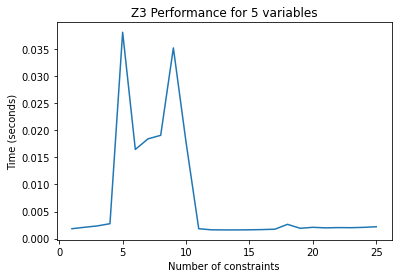

In [ ]:
random.seed(42)
plot_one_z3_performance(5, use_max=True)

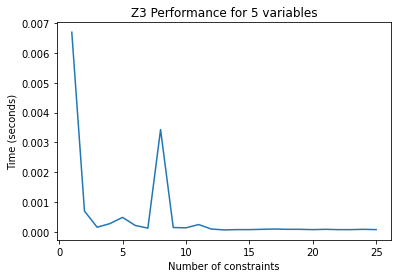

In [ ]:
random.seed(42)
plot_one_z3_performance(5, use_max=False)

In [ ]:
def plot_all_z3_performance(num_var: int, use_max: bool):
  """
  Measure and plot Z3's performance for [1, num_var] variables
  """
  for i in range(1, num_var + 1):
    num_constraints, times = z3_performance(i, use_max)

    plt.plot(num_constraints, times, label=str(i))

  plt.title("Z3 Performance")
  plt.xlabel("Number of constraints")
  plt.ylabel("Time (seconds)")
  plt.legend(title="Number of variables")
  plt.show()

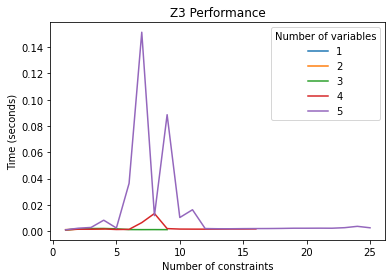

In [ ]:
random.seed(42)
plot_all_z3_performance(5, use_max=True)

In [ ]:
random.seed(42)
plot_all_z3_performance(25, use_max=False)